<a href="https://colab.research.google.com/github/sastha-06/24ADI003_ML_LAB/blob/main/24BAD106_ML_EX4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1:
i import all required Python libraries.
- pandas and numpy for data handling.
- string for text cleaning.
- matplotlib and seaborn for visualization.
- sklearn modules for machine learning tasks.

Step 2:
i load the SMS Spam dataset using pandas.
i keep only two important columns:
- label (Spam or Ham)
- message (SMS text)

Step 3:
i perform data preprocessing.
- Convert all text into lowercase.
- Remove punctuation symbols.
- Remove stopwords (common words like “the”, “is”, etc.).
This improves model performance.

Step 4:
i convert text into numerical features using TF-IDF.
TF-IDF assigns importance values to words.
Now text data becomes numerical feature data.

Step 5:
i encode the target labels.
- Ham is converted to 0.
- Spam is converted to 1.
Machine learning models require numeric values.

Step 6:
i split the dataset into:
- Training data (80%)
- Testing data (20%)
Training data is used to train the model.
Testing data is used to evaluate performance.

Step 7:
i create and train the Multinomial Naïve Bayes classifier.
i use alpha = 1 for Laplace smoothing.
Laplace smoothing prevents zero probability problems.

Step 8:
i use the trained model to predict
whether each test message is Spam or Ham.

Step 9:
i evaluate the model performance using:
- Accuracy (overall correct predictions)
- Precision (correct spam detection)
- Recall (ability to detect spam messages)
- F1 Score (balance between precision and recall)

Step 10:
i generate a confusion matrix.
It shows:
- True Positives
- True Negatives
- False Positives
- False Negatives
Wi visualize it using a heatmap.

Step 11:
i analyze misclassified examples.
i display some messages that were predicted incorrectly.
This helps me understand model mistakes.

Step 12:
i test different alpha values (Laplace smoothing).
i compare accuracy for different smoothing values
to observe its impact on model performance.


SASTHA JEYASRI A
24BAD106
Columns: Index(['label', 'message'], dtype='object')

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


Model Performance:
Accuracy: 0.967713004484305
Precision: 1.0
Recall: 0.76
F1 Score: 0.8636363636363636


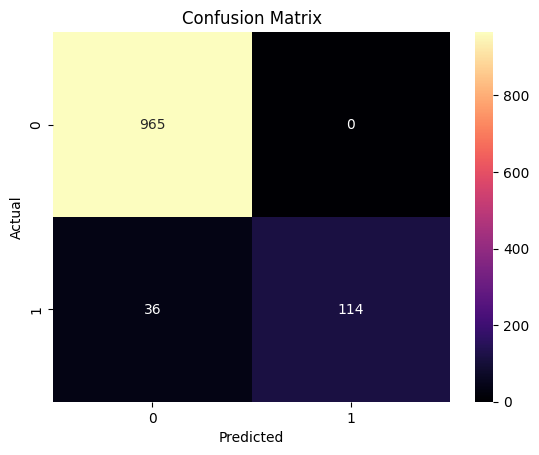


Some Misclassified Messages:

Actual: 1 Predicted: 0
------
Actual: 1 Predicted: 0
------
Actual: 1 Predicted: 0
------
Actual: 1 Predicted: 0
------
Actual: 1 Predicted: 0
------

Accuracy with Different Alpha Values:

Alpha = 0.1 -> Accuracy = 0.9802690582959641
Alpha = 1 -> Accuracy = 0.967713004484305
Alpha = 2 -> Accuracy = 0.9336322869955157


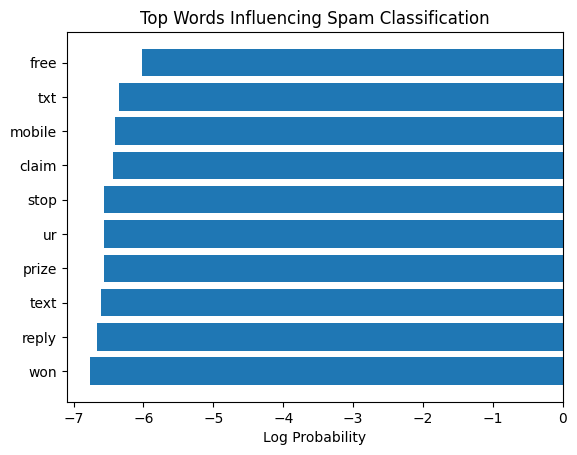

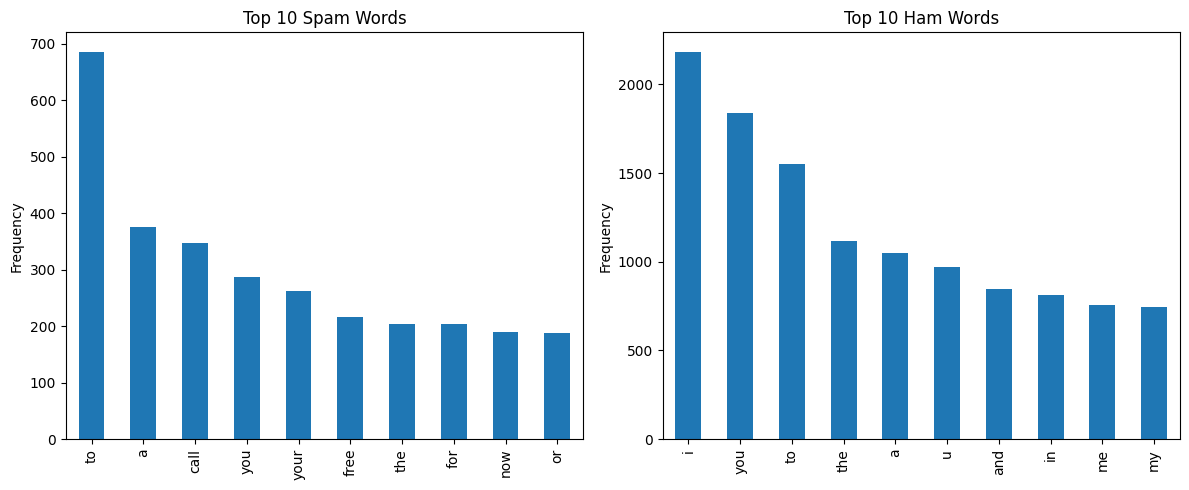

In [ ]:
#from google.colab import files
#uploaded=files.upload()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

print("SASTHA JEYASRI A\n24BAD106")

#Load Dataset
data = pd.read_csv("spam.csv", encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']
print("Columns:", data.columns)

#Text Cleaning
def clean_text(text_data):
    text_data = text_data.lower()
    text_data = text_data.translate(str.maketrans('', '', string.punctuation))
    return text_data

data['message'] = data['message'].apply(clean_text)

#Convert Text to Numerical Features (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['message'])

#Encode Labels
le = LabelEncoder()
y = le.fit_transform(data['label'])  # ham=0, spam=1

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#Train Model
model = MultinomialNB(alpha=1)
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

#Model Evaluation
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d',cmap='magma')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Misclassified Messages
misclassified = np.where(y_test != y_pred)[0]

print("\nSome Misclassified Messages:\n")
for i in misclassified[:5]:
    print("Actual:", y_test[i], "Predicted:", y_pred[i])
    print("------")

#Accuracy with Different Alpha Values
print("\nAccuracy with Different Alpha Values:\n")

for alpha_value in [0.1, 1, 2]:
    temp_model = MultinomialNB(alpha=alpha_value)
    temp_model.fit(X_train, y_train)
    temp_pred = temp_model.predict(X_test)
    print(f"Alpha = {alpha_value} -> Accuracy = {accuracy_score(y_test, temp_pred)}")


# ===========================================
# VISUALIZATION 2 – TOP WORDS INFLUENCING SPAM
# ===========================================

feature_names = np.array(vectorizer.get_feature_names_out())
spam_log_probs = model.feature_log_prob_[1]

top_indices = np.argsort(spam_log_probs)[-10:]
top_words = feature_names[top_indices]
top_values = spam_log_probs[top_indices]

plt.figure()
plt.barh(top_words, top_values)
plt.title("Top Words Influencing Spam Classification")
plt.xlabel("Log Probability")
plt.show()


# ===========================================
# VISUALIZATION 3 – WORD FREQUENCY (Spam vs Ham)
# ===========================================

spam_messages = data[data['label']=='spam']['message']
ham_messages = data[data['label']=='ham']['message']

spam_words = ' '.join(spam_messages).split()
ham_words = ' '.join(ham_messages).split()

spam_freq = pd.Series(spam_words).value_counts().head(10)
ham_freq = pd.Series(ham_words).value_counts().head(10)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
spam_freq.plot(kind='bar')
plt.title("Top 10 Spam Words")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
ham_freq.plot(kind='bar')
plt.title("Top 10 Ham Words")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()




Step 1: I import all required Python libraries.
matplotlib and seaborn are used for visualization.
sklearn modules are used for loading dataset, splitting data, training model, and evaluation.

Step 2: I load the Iris dataset using sklearn.
The dataset contains four numerical features:

sepal length
sepal width
petal length
petal width

The target variable contains three flower species.

Step 3: I split the dataset into:

Training data (70%)
Testing data (30%)

Training data is used to train the model.
Testing data is used to evaluate model performance.

Step 4: I create and train the Gaussian Naïve Bayes classifier.
Gaussian NB is suitable because the dataset contains continuous numerical features that follow a normal distribution.

Step 5: I use the trained model to predict the species labels for the test data.

Step 6: I evaluate the model performance using:

Accuracy (overall correct predictions)
Precision (correct classification per class)
Recall (ability to correctly identify each class)
F1 Score (balance between precision and recall)

Step 7: I generate a confusion matrix.
It shows how many samples are correctly and incorrectly classified for each species.
I visualize it using a heatmap.

Step 8: I plot the decision boundary using two features (Petal Length and Petal Width).
This visualization shows how Gaussian Naïve Bayes separates the three classes.

Step 9: I display class probabilities for the first few test samples.
This shows the confidence level of the model for each predicted class.

SASTHA JEYASRI A
24BAD106

Model Performance:
Accuracy: 0.9777777777777777
Precision: 0.9793650793650793
Recall: 0.9777777777777777
F1 Score: 0.9777448559670782

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



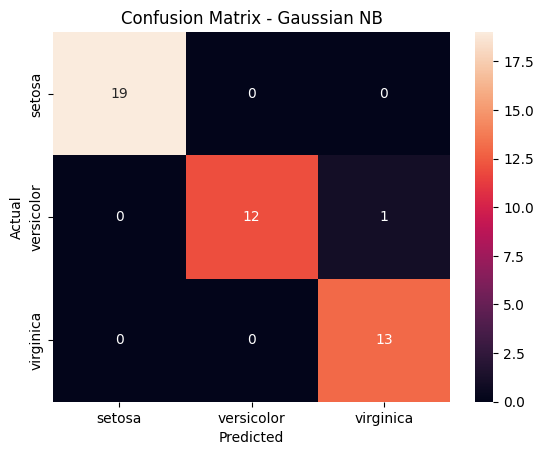

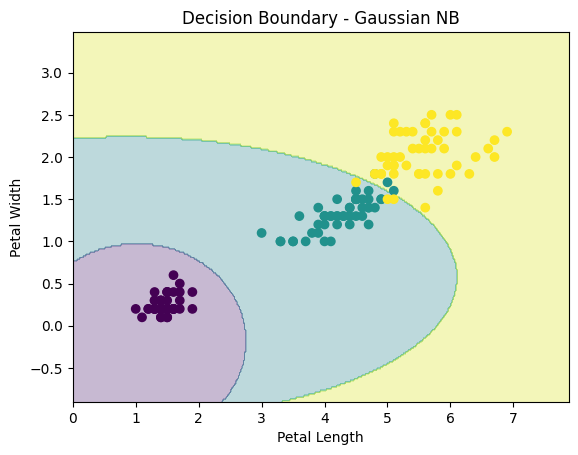

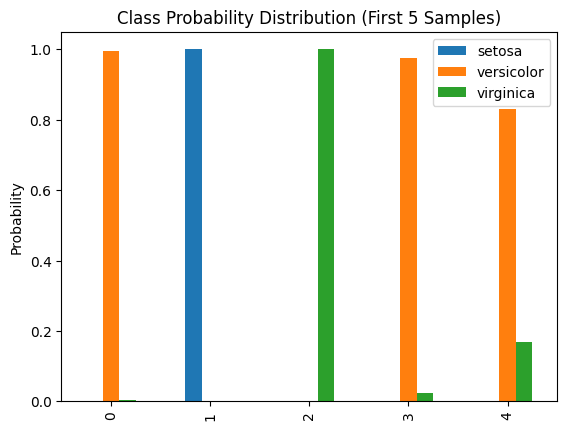


Class Probabilities (First 5 Samples):

          setosa    versicolor     virginica
0   4.158800e-88  9.955278e-01  4.472166e-03
1   1.000000e+00  1.310312e-13  2.217722e-20
2  9.831702e-285  2.701386e-12  1.000000e+00
3   9.547453e-92  9.748614e-01  2.513857e-02
4  1.086796e-103  8.319107e-01  1.680893e-01


In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("SASTHA JEYASRI A\n24BAD106")

#Load Iris dataset
iris = load_iris()
X = iris.data        # Features
y = iris.target      # Target labels

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

#Train Gaussian Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

#Predict species labels
y_pred = model.predict(X_test)

#Evaluate performance
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Confusion Matrix - Gaussian NB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Visualization 2 – Decision Boundary (Using 2 Features)

X2 = iris.data[:, 2:4]   # Petal length & width
y2 = iris.target

model2 = GaussianNB()
model2.fit(X2, y2)

x_min, x_max = X2[:, 0].min()-1, X2[:, 0].max()+1
y_min, y_max = X2[:, 1].min()-1, X2[:, 1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Decision Boundary - Gaussian NB")
plt.show()

#Visualization 3 – Class Probability Distribution (First 5 Samples)

probabilities = model.predict_proba(X_test[:5])

prob_df = pd.DataFrame(probabilities, columns=iris.target_names)

prob_df.plot(kind='bar')
plt.title("Class Probability Distribution (First 5 Samples)")
plt.ylabel("Probability")
plt.show()

print("\nClass Probabilities (First 5 Samples):\n")
print(prob_df)